# AIR QUALITY PROJECT

#### The main aim of this project to identify the patterns in features that dertemine the quality of air in different cities across the global. It applies several EDX techniques to understand the data and derive insights from it. Techniques to be applied involve; data cleaning, data manipulation, data exploration, data wrangling, data preprocessing, data visualization and interpretation of the findings.  
#### Finally the project will end with a predictive model to be used for prediction of the air quality in different cities at different times  

#### The dataset used in this project was obtained from "openAQ" and it involves cities like: Nairobi, Nakuru, Colombo, Sydney, Shen Yeng, New Haven, Addis Ababa and Snare Rapids

## Importing required pacgages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
%matplotlib inline

### Setting up the background, font and style

In [2]:
sns.set_style('darkgrid')
plt.rcParams['font.size']=14
plt.rcParams['figure.figsize']=(10,6)
plt.rcParams['figure.facecolor']='#00000000'

### Loaading the dataset

In [3]:
nakuru = pd.read_csv("C:\\DSA1080 TASKS\\Nakuru.csv")
nyayo = pd.read_csv("C:\\DSA1080 TASKS\\Nyayo Embakasi.csv")
obsterd = pd.read_csv("C:\\DSA1080 TASKS\\Obesterd.csv")
sydney = pd.read_csv("C:\\DSA1080 TASKS\\Sydney Australia.csv")
new_haven = pd.read_csv("C:\\DSA1080 TASKS\\New Haven_ USA.csv")
belsk = pd.read_csv("C:\\DSA1080 TASKS\\Belsk_USA.csv")
kaposvar = pd.read_csv("C:\\DSA1080 TASKS\\Kaposvar_Canada.csv")

### Merging the dataset intoa single dataframe

In [4]:
cities = pd.concat([nakuru,nyayo,obsterd, sydney, new_haven, belsk, kaposvar],ignore_index=True)


### Adjusting city names for easier readind

In [5]:
cities['location_name'] = cities['location_name'].replace('Malkia, Nakuru (DBUSY3473 → ATQJXRNT)', 'Nakuru_Kenya')
cities['location_name'] = cities['location_name'].replace('Nyayo Embakasi, Nairobi', 'Nairobi_Kenya')
cities['location_name'] = cities['location_name'].replace('Belsk Duży, IGF PAN', 'Belsk_USA')
cities['location_name'] = cities['location_name'].replace('Hauptstraße Oberstedten', 'Obsterd_USA')
cities['location_name'] = cities['location_name'].replace('Sydney, Australia', 'Sydney_Australia')
cities['location_name'] = cities['location_name'].replace('New Haven', 'New Haven_USA')
cities['location_name'] = cities['location_name'].replace('Kaposvár', 'Kaposvár_Canada')

In [14]:
cities.head()

,location_id,location_name,parameter,value,unit,datetimeUtc,datetimeLocal,timezone,latitude,longitude,country_iso,isMobile,isMonitor,owner_name,provider
0,1894637,Nakuru_Kenya,temperature,13.0,c,2024-01-24T04:00:00+00:00,2024-01-24T07:00:00+03:00,Africa/Nairobi,-0.267398,36.021802,NaN,NaN,NaN,Clarity,clarity
1,1894637,Nakuru_Kenya,temperature,13.0,c,2024-01-24T05:00:00+00:00,2024-01-24T08:00:00+03:00,Africa/Nairobi,-0.267398,36.021802,NaN,NaN,NaN,Clarity,clarity
2,1894637,Nakuru_Kenya,temperature,15.0,c,2024-01-24T06:00:00+00:00,2024-01-24T09:00:00+03:00,Africa/Nairobi,-0.267398,36.021802,NaN,NaN,NaN,Clarity,clarity
3,1894637,Nakuru_Kenya,temperature,17.0,c,2024-01-24T07:00:00+00:00,2024-01-24T10:00:00+03:00,Africa/Nairobi,-0.267398,36.021802,NaN,NaN,NaN,Clarity,clarity
4,1894637,Nakuru_Kenya,temperature,19.0,c,2024-01-24T08:00:00+00:00,2024-01-24T11:00:00+03:00,Africa/Nairobi,-0.267398,36.021802,NaN,NaN,NaN,Clarity,clarity


### Checking for the count of parameters at each city

In [15]:
# Group the data by city and parameter and count occurrences
city_param = cities.groupby(['location_name', 'parameter']).size().reset_index(name='counts')

# Specifying rows and columns
city_param1 = city_param.pivot(index='location_name', columns='parameter', values='counts')
city_param1


parameter,co,no,no2,o3,pm1,pm10,pm25,relativehumidity,so2,temperature,um003
location_name,,,,,,,,,,,
Belsk_USA,1000.0,NaN,1000.0,1000.0,NaN,1000.0,NaN,NaN,1000.0,NaN,NaN
Kaposvár_Canada,1000.0,NaN,1000.0,1000.0,NaN,1000.0,1000.0,NaN,1000.0,NaN,NaN
Nairobi_Kenya,NaN,NaN,NaN,NaN,114.0,114.0,652.0,106.0,NaN,652.0,106.0
Nakuru_Kenya,NaN,NaN,NaN,NaN,1000.0,1000.0,1000.0,NaN,NaN,1171.0,NaN
New Haven_USA,1000.0,1000.0,1000.0,1000.0,NaN,1000.0,1000.0,NaN,1000.0,NaN,NaN
Obsterd_USA,NaN,NaN,NaN,NaN,210.0,210.0,1000.0,203.0,NaN,1000.0,203.0
Sydney_Australia,NaN,NaN,NaN,NaN,192.0,192.0,729.0,181.0,NaN,729.0,181.0


#### Particulate matter
is a mix of solids and liquids, including carbon, complex organic chemicals, sulphates, nitrates, mineral dust, and water suspended in the air.(pm25,pm1,pm10)

#### Measurement units
a. ug/m3 : micro gram/cubic meter b. ppm : Parts Per Million

#### Pollutants
a. O3 : Ozone gas b. SO2 : Sulphur Dioxed c. NO2 : Nitrogen Dioxed d. PM2.5 : Particles with an aerodynamic diameter less than 2.5μm e. PM10 : Particles with an aerodynamic diameter less than 10μm f. CO : Carbon monoxide


#### Checking and handling duplicates and missing values

In [17]:
cities.duplicated().sum()

12

In [18]:
cities.isnull().sum()

location_id          0
location_name        0
parameter            0
value                0
unit                 0
datetimeUtc          0
datetimeLocal        0
timezone             0
latitude             0
longitude            0
country_iso      28945
isMobile         28945
isMonitor        28945
owner_name           0
provider             0
dtype: int64

In [19]:
# Droping all duplicated found in location name and valuue

cities1 = cities.drop_duplicates(subset=["location_name", "value"])

#### Droping unwanted columns with alot of missing values

In [20]:
cities1.drop(columns=['datetimeUtc','country_iso','isMobile',
                               'isMonitor','owner_name','provider'], inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_18252\183600701.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [21]:
cities1

,location_id,location_name,parameter,value,unit,datetimeLocal,timezone,latitude,longitude
0,1894637,Nakuru_Kenya,temperature,13.0,c,2024-01-24T07:00:00+03:00,Africa/Nairobi,-0.267398,36.021802
2,1894637,Nakuru_Kenya,temperature,15.0,c,2024-01-24T09:00:00+03:00,Africa/Nairobi,-0.267398,36.021802
3,1894637,Nakuru_Kenya,temperature,17.0,c,2024-01-24T10:00:00+03:00,Africa/Nairobi,-0.267398,36.021802
4,1894637,Nakuru_Kenya,temperature,19.0,c,2024-01-24T11:00:00+03:00,Africa/Nairobi,-0.267398,36.021802
5,1894637,Nakuru_Kenya,temperature,22.0,c,2024-01-24T12:00:00+03:00,Africa/Nairobi,-0.267398,36.021802
...,...,...,...,...,...,...,...,...,...
27377,1192419,Kaposvár_Canada,o3,95.0,µg/m³,2023-09-05T13:00:00+02:00,Europe/Budapest,46.371580,17.796800
27477,1192419,Kaposvár_Canada,o3,72.0,µg/m³,2023-09-09T21:00:00+02:00,Europe/Budapest,46.371580,17.796800
27524,1192419,Kaposvár_Canada,o3,55.0,µg/m³,2023-09-11T21:00:00+02:00,Europe/Budapest,46.371580,17.796800
27564,1192419,Kaposvár_Canada,o3,150.0,µg/m³,2023-09-13T16:00:00+02:00,Europe/Budapest,46.371580,17.796800


#### Extracting only dates from datelocal column for summary analysis

In [25]:

cities1['datetimeLocal'] = pd.to_datetime(cities1['datetimeLocal'], utc=True)
cities1['Date'] = cities1['datetimeLocal'].dt.date

C:\Users\Admin\AppData\Local\Temp\ipykernel_18252\2912368088.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Admin\AppData\Local\Temp\ipykernel_18252\2912368088.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## GENERAL EXPLORATORY ANALYSIS, VISUALIZATION & INTEPRETATION

In [26]:
# Total number of parameters at each city grouped by location name

fig = px.histogram(cities1, x='parameter',color='location_name', 
                   title='PARAMETERS AT EACH CITY')
fig.update_layout(bargap=0.1)


This is aimed at underdstanding which parameters are available in each city for comparison analysis

In [34]:
# Visualizing how many times each city is appearing in the dataset

fig = px.histogram(cities1, x='location_name',color='location_name', 
                   title='COUNT OF EACH CITY')
fig.update_layout(bargap=0.1)

This was purposed to get the count of each city and how many time s each is appearing in each dataset

# Time Series Analysis at each city

This involves looking at the distribution visually, understanding of some statistics within the data and also visualize the distribution of various parameters then deduce conculsions.

We used pie charts, histograms, box plots, line graphs and statistical tables to do the analysis for each parameter to help visualize how the air quality fluctuates over time for different parameters

# NEW HAVEN_USA

In [120]:
new_haven = cities1[cities1["location_name"]=="New Haven_USA"]
pd.DataFrame(new_haven)

,location_id,location_name,parameter,value,unit,datetimeLocal,timezone,latitude,longitude,Date
10945,8466,New Haven_USA,no,0.0094,ppm,2023-03-29 17:00:00+00:00,America/New_York,41.301288,-72.902685,2023-03-29
10946,8466,New Haven_USA,no,0.0120,ppm,2023-03-29 18:00:00+00:00,America/New_York,41.301288,-72.902685,2023-03-29
10948,8466,New Haven_USA,no,0.0023,ppm,2023-03-29 20:00:00+00:00,America/New_York,41.301288,-72.902685,2023-03-29
10949,8466,New Haven_USA,no,0.0012,ppm,2023-03-29 21:00:00+00:00,America/New_York,41.301288,-72.902685,2023-03-29
10950,8466,New Haven_USA,no,0.0011,ppm,2023-03-29 22:00:00+00:00,America/New_York,41.301288,-72.902685,2023-03-29
...,...,...,...,...,...,...,...,...,...,...
17457,8466,New Haven_USA,pm10,52.0000,µg/m³,2020-01-23 23:00:00+00:00,America/New_York,41.301288,-72.902685,2020-01-23
17459,8466,New Haven_USA,pm10,40.0000,µg/m³,2020-01-24 01:00:00+00:00,America/New_York,41.301288,-72.902685,2020-01-24
17465,8466,New Haven_USA,pm10,50.0000,µg/m³,2020-01-24 07:00:00+00:00,America/New_York,41.301288,-72.902685,2020-01-24
17467,8466,New Haven_USA,pm10,49.0000,µg/m³,2020-01-24 09:00:00+00:00,America/New_York,41.301288,-72.902685,2020-01-24


### Summary Statistics of parameters

In [122]:
summary_newhaven = new_haven.groupby(['Date', 'parameter'])['value'].agg(['mean', 'median', 'min', 'max']).reset_index()
print(summary_newhaven.head(10))


         Date parameter       mean  median    min     max
0  2020-01-01        co   0.217000   0.205  0.150   0.320
1  2020-01-01        o3   0.027000   0.027  0.027   0.027
2  2020-01-01      pm25   6.023077   3.300  2.500  15.000
3  2020-01-01       so2   0.000000   0.000  0.000   0.000
4  2020-01-02        co   0.290000   0.305  0.190   0.360
5  2020-01-02        o3   0.007000   0.007  0.007   0.007
6  2020-01-02      pm25   7.470588   8.000  3.600  11.000
7  2020-01-03        co   0.411538   0.390  0.230   0.620
8  2020-01-03        o3   0.004000   0.004  0.004   0.004
9  2020-01-03      pm25  14.250000  15.500  7.600  20.000


### Pie chart for parameters parcentage proportions

Text(0.5, 1.0, 'PIE CHART OF PARAMETERS')

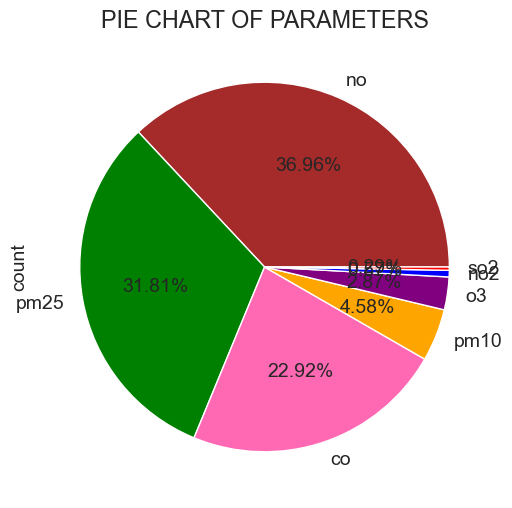

In [124]:
# Percentage distribution of each parameter
color = ['brown', 'green', 'hotpink', 'orange', 'purple','blue','red']

new_haven['parameter'].value_counts().plot(kind='pie',figsize=(6,6),autopct='%0.2f%%', colors=color)
plt.title("PIE CHART OF PARAMETERS")

## Histogram distribution of all parameters

In [126]:
fig = px.histogram(new_haven, x='value', color='parameter', marginal='box',title='Distribution of Air Quality Measurements', 
                   barmode='overlay', # Set bars to overlay on top of the other'
                   nbins=20,
                   histnorm='percent', # to invlude percentage
                   histfunc='count', # Set histfunc to 'count'
                   opacity=0.7)
fig.update_layout(bargap=0.1)
fig.show()


## Parameter analysis over time in New haven

In [133]:
# Time Series Plots
fig = px.line(new_haven, x='datetimeLocal', y='value', color='parameter', title='Air Quality Time Series',
              labels={'datetimeLocal': 'Date', 'value': 'Value'})
fig.show()


# Nairobi_Kenya

In [67]:
kenya = cities1[cities1["location_name"]=="Nairobi_Kenya"]
pd.DataFrame(kenya).tail()

,location_id,location_name,parameter,value,unit,datetimeLocal,timezone,latitude,longitude,Date
5855,2388059,Nairobi_Kenya,pm10,120.0,µg/m³,2024-03-14 17:00:00+00:00,Africa/Nairobi,-1.304011,36.907681,2024-03-14
5856,2388059,Nairobi_Kenya,pm10,79.0,µg/m³,2024-03-14 18:00:00+00:00,Africa/Nairobi,-1.304011,36.907681,2024-03-14
5861,2388059,Nairobi_Kenya,pm10,230.0,µg/m³,2024-03-15 05:00:00+00:00,Africa/Nairobi,-1.304011,36.907681,2024-03-15
5862,2388059,Nairobi_Kenya,pm10,66.0,µg/m³,2024-03-15 06:00:00+00:00,Africa/Nairobi,-1.304011,36.907681,2024-03-15
5871,2388059,Nairobi_Kenya,pm10,97.0,µg/m³,2024-03-15 15:00:00+00:00,Africa/Nairobi,-1.304011,36.907681,2024-03-15


Text(0.5, 1.0, 'PIE CHART OF PARAMETERS')

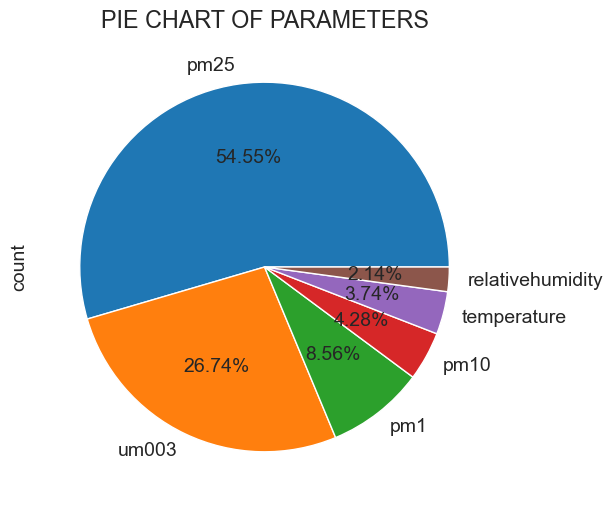

In [68]:
# Percentage distribution of each parameter

kenya['parameter'].value_counts().plot(kind='pie',figsize=(6,6),autopct='%0.2f%%')
plt.title("PIE CHART OF PARAMETERS")

In [125]:
fig = px.histogram(kenya, x='value', color='parameter', marginal='box',title='Distribution of Air Quality Measurements', 
                   barmode='overlay', # Set bars to overlay on top of the other'
                   nbins=20,
                   histnorm='percent', # to invlude percentage
                   histfunc='count', # Set histfunc to 'count'
                   opacity=0.7)
fig.update_layout(bargap=0.1)
fig.show()


Through the combination of the histogram and a box plot, we can be able to determine the concentration levels of each parameter by considering its count and value range

In [69]:
# Time Series Plots
fig = px.line(kenya, x='datetimeLocal', y='value', color='parameter', title='Air Quality Time Series',
              labels={'datetimeLocal': 'Date', 'value': 'Value'})
fig.show()


## Statistical summary of parameters

In [70]:
summary_stat = kenya.groupby(['Date', 'parameter'])['value'].agg(['mean', 'median', 'min', 'max']).reset_index()
print(summary_stat.head(10))


         Date    parameter       mean  median   min   max
0  2024-02-06         pm25  28.900000   27.50   8.8  73.0
1  2024-02-06  temperature  27.500000   27.50  27.0  28.0
2  2024-02-07         pm25  18.200000   15.00  11.0  31.0
3  2024-02-07  temperature  29.000000   29.00  29.0  29.0
4  2024-02-08         pm25  23.175000   14.00   7.9  62.0
5  2024-02-09         pm25  22.785714    9.20   7.8  63.0
6  2024-02-10         pm25  11.450000    9.25   8.3  19.0
7  2024-02-11         pm25  53.333333   52.00  50.0  58.0
8  2024-02-12         pm25  67.000000   67.00  67.0  67.0
9  2024-02-13         pm25  41.000000   44.00  33.0  46.0


### The line plot shows parameters affecting air quality have been increasing or decreasing over time. At aglance we can conclude that parameters have been increasing overtime leading to poor air quality generally. This implies that more measures need to be taken to curb negative effect of porr air quality to humans

# Nakuru_KENYA

In [78]:
nakuru = cities1[cities1["location_name"]=="Nakuru_Kenya"]
pd.DataFrame(nakuru)

,location_id,location_name,parameter,value,unit,datetimeLocal,timezone,latitude,longitude,Date
0,1894637,Nakuru_Kenya,temperature,13.0,c,2024-01-24 04:00:00+00:00,Africa/Nairobi,-0.267398,36.021802,2024-01-24
2,1894637,Nakuru_Kenya,temperature,15.0,c,2024-01-24 06:00:00+00:00,Africa/Nairobi,-0.267398,36.021802,2024-01-24
3,1894637,Nakuru_Kenya,temperature,17.0,c,2024-01-24 07:00:00+00:00,Africa/Nairobi,-0.267398,36.021802,2024-01-24
4,1894637,Nakuru_Kenya,temperature,19.0,c,2024-01-24 08:00:00+00:00,Africa/Nairobi,-0.267398,36.021802,2024-01-24
5,1894637,Nakuru_Kenya,temperature,22.0,c,2024-01-24 09:00:00+00:00,Africa/Nairobi,-0.267398,36.021802,2024-01-24
...,...,...,...,...,...,...,...,...,...,...
2648,1894637,Nakuru_Kenya,pm10,78.0,µg/m³,2023-12-19 05:00:00+00:00,Africa/Nairobi,-0.267398,36.021802,2023-12-19
2673,1894637,Nakuru_Kenya,pm10,71.0,µg/m³,2023-12-20 06:00:00+00:00,Africa/Nairobi,-0.267398,36.021802,2023-12-20
2818,1894637,Nakuru_Kenya,pm10,99.0,µg/m³,2023-12-26 07:00:00+00:00,Africa/Nairobi,-0.267398,36.021802,2023-12-26
3140,1894637,Nakuru_Kenya,pm10,81.0,µg/m³,2024-01-08 17:00:00+00:00,Africa/Nairobi,-0.267398,36.021802,2024-01-08


Text(0.5, 1.0, 'PIE CHART OF PARAMETERS')

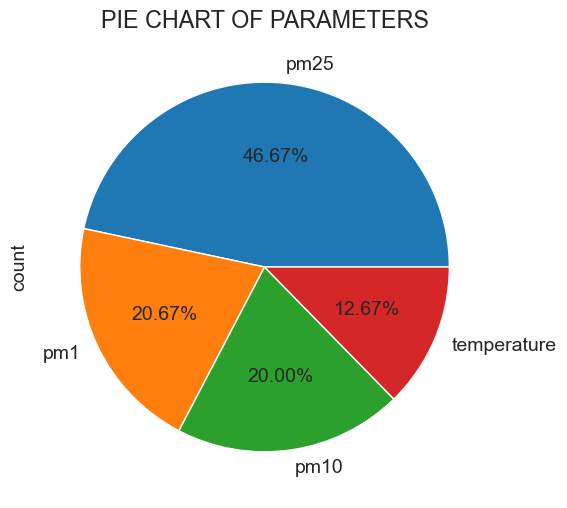

In [80]:
# Percentage distribution of each parameter

nakuru['parameter'].value_counts().plot(kind='pie',figsize=(6,6),autopct='%0.2f%%')
plt.title("PIE CHART OF PARAMETERS")

## Summary Statistics

In [81]:
summary_naks = nakuru.groupby(['Date', 'parameter'])['value'].agg(['mean', 'median', 'min', 'max']).reset_index()
print(summary_naks.head(10))


         Date parameter       mean  median   min   max
0  2023-11-28      pm25  10.900000    11.0   9.7  12.0
1  2023-11-29      pm10  43.500000    43.5  43.0  44.0
2  2023-11-29      pm25   8.088889     7.9   7.3   9.3
3  2023-11-30       pm1   4.500000     4.8   3.5   5.2
4  2023-11-30      pm10  64.500000    62.5  47.0  86.0
5  2023-11-30      pm25   7.600000     6.9   6.6  10.0
6  2023-12-01       pm1   3.300000     3.3   2.8   3.8
7  2023-12-01      pm10  61.000000    61.0  59.0  63.0
8  2023-12-01      pm25   7.083333     7.1   5.5   8.4
9  2023-12-02       pm1   5.300000     5.3   5.3   5.3


In [86]:
fig = px.histogram(nakuru, x='value', color='parameter', marginal='box',title='Distribution of Air Quality Measurements', 
                   barmode='overlay', # Set bars to overlay on top of the other'
                   nbins=20,
                   histnorm='percent', # to invlude percentage
                   histfunc='count', # Set histfunc to 'count'
                   opacity=0.7)
fig.update_layout(bargap=0.1)
fig.show()


From the Histogram above, we can see that most of the parameters ranges from 0 to 50 with more concetration on lower values resulting into left skewness 

In [88]:
# Time Series Plots
fig = px.line(nakuru, x='datetimeLocal', y='value', color='parameter', title='Air Quality Time Series in Nakuru',
              labels={'datetimeLocal': 'Date', 'value': 'Value'})
fig.show()


# Sydney_Australia

In [89]:
sydney = cities1[cities1["location_name"] == "Sydney_Australia"]
pd.DataFrame(sydney)

,location_id,location_name,parameter,value,unit,datetimeLocal,timezone,latitude,longitude,Date
8741,2392564,Sydney_Australia,pm1,3.5,µg/m³,2024-03-06 17:00:00+00:00,Australia/Sydney,-33.887737,151.215026,2024-03-06
8742,2392564,Sydney_Australia,pm1,2.8,µg/m³,2024-03-06 18:00:00+00:00,Australia/Sydney,-33.887737,151.215026,2024-03-06
8743,2392564,Sydney_Australia,pm1,2.9,µg/m³,2024-03-06 19:00:00+00:00,Australia/Sydney,-33.887737,151.215026,2024-03-06
8744,2392564,Sydney_Australia,pm1,3.6,µg/m³,2024-03-06 20:00:00+00:00,Australia/Sydney,-33.887737,151.215026,2024-03-06
8745,2392564,Sydney_Australia,pm1,5.1,µg/m³,2024-03-06 21:00:00+00:00,Australia/Sydney,-33.887737,151.215026,2024-03-06
...,...,...,...,...,...,...,...,...,...,...
10887,2392564,Sydney_Australia,relativehumidity,54.0,%,2024-03-15 06:00:00+00:00,Australia/Sydney,-33.887737,151.215026,2024-03-15
10889,2392564,Sydney_Australia,relativehumidity,56.0,%,2024-03-15 08:00:00+00:00,Australia/Sydney,-33.887737,151.215026,2024-03-15
10921,2392564,Sydney_Australia,relativehumidity,88.0,%,2024-03-16 18:00:00+00:00,Australia/Sydney,-33.887737,151.215026,2024-03-16
10923,2392564,Sydney_Australia,relativehumidity,89.0,%,2024-03-16 20:00:00+00:00,Australia/Sydney,-33.887737,151.215026,2024-03-16


#### Proportional Percentage of each parameter

Text(0.5, 1.0, 'SYDNEY PARAMETERS')

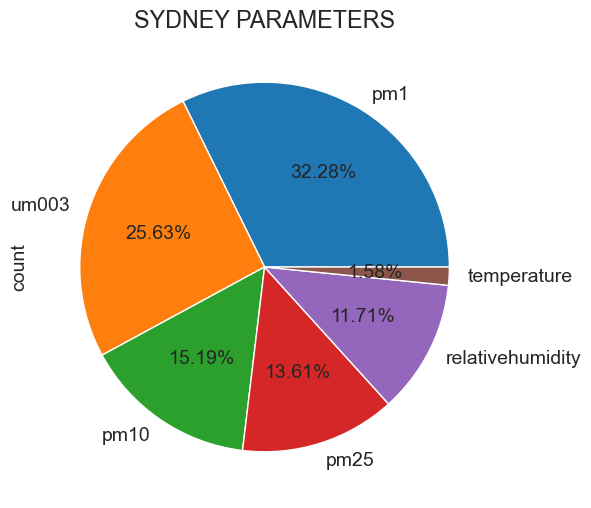

In [90]:
sydney['parameter'].value_counts().plot(kind='pie',figsize=(6,6),autopct='%0.2f%%')
plt.title("SYDNEY PARAMETERS")

## Summary statistics

In [91]:
summary_sydney = sydney.groupby(['Date', 'parameter'])['value'].agg(['mean', 'median', 'min', 'max']).reset_index()
print(summary_sydney.head(10))


         Date    parameter       mean  median    min    max
0  2024-02-07         pm25   0.520000    0.52   0.47   0.57
1  2024-02-08         pm25   0.583333    0.56   0.38   0.81
2  2024-02-08  temperature  26.000000   26.00  25.00  27.00
3  2024-02-09         pm25   7.500000    7.50   7.50   7.50
4  2024-02-10         pm25   5.600000    5.60   5.60   5.60
5  2024-02-12         pm25   3.800000    3.80   3.80   3.80
6  2024-02-12  temperature  34.000000   34.00  34.00  34.00
7  2024-02-13         pm25  10.650000   10.65   6.30  15.00
8  2024-02-13  temperature  31.000000   31.00  31.00  31.00
9  2024-02-14         pm25   4.500000    4.50   4.50   4.50


### Parameter distribution

In [96]:
fig = px.histogram(sydney, x='value', color='parameter', marginal='box',title='Distribution of Air Quality Measurements', 
                   barmode='overlay', # Set bars to overlay on top of the other'
                   nbins=20,
                   histnorm='percent', # to invlude percentage
                   histfunc='count', # Set histfunc to 'count'
                   opacity=0.5)
fig.update_layout(bargap=0.1)
fig.show()


## Parameter trend over time

In [97]:
# Time Series Plots
fig = px.line(sydney, x='datetimeLocal', y='value', color='parameter', title='Air Quality Time Series in Sydney',
              labels={'datetimeLocal': 'Date', 'value': 'Value'})
fig.show()


# Obsterd_USA

In [98]:
obsterd = cities1[cities1["location_name"]=="Obsterd_USA"]
pd.DataFrame(obsterd)

,location_id,location_name,parameter,value,unit,datetimeLocal,timezone,latitude,longitude,Date
5915,1235982,Obsterd_USA,um003,1300.00,particles/cm³,2024-03-07 00:00:00+00:00,Europe/Berlin,50.226631,8.564387,2024-03-07
5916,1235982,Obsterd_USA,um003,1700.00,particles/cm³,2024-03-07 01:00:00+00:00,Europe/Berlin,50.226631,8.564387,2024-03-07
5917,1235982,Obsterd_USA,um003,1600.00,particles/cm³,2024-03-07 02:00:00+00:00,Europe/Berlin,50.226631,8.564387,2024-03-07
5918,1235982,Obsterd_USA,um003,1400.00,particles/cm³,2024-03-07 03:00:00+00:00,Europe/Berlin,50.226631,8.564387,2024-03-07
5919,1235982,Obsterd_USA,um003,1200.00,particles/cm³,2024-03-07 04:00:00+00:00,Europe/Berlin,50.226631,8.564387,2024-03-07
...,...,...,...,...,...,...,...,...,...,...
8138,1235982,Obsterd_USA,pm25,0.95,µg/m³,2023-08-03 10:00:00+00:00,Europe/Berlin,50.226631,8.564387,2023-08-03
8196,1235982,Obsterd_USA,pm25,0.33,µg/m³,2023-08-06 14:00:00+00:00,Europe/Berlin,50.226631,8.564387,2023-08-06
8197,1235982,Obsterd_USA,pm25,0.55,µg/m³,2023-08-06 15:00:00+00:00,Europe/Berlin,50.226631,8.564387,2023-08-06
8198,1235982,Obsterd_USA,pm25,0.96,µg/m³,2023-08-06 16:00:00+00:00,Europe/Berlin,50.226631,8.564387,2023-08-06


### Summary overview of Obstered city parameters

In [99]:
summary_obs = obsterd.groupby(['Date', 'parameter'])['value'].agg(['mean', 'median', 'min', 'max']).reset_index()
print(summary_obs.head(10))


         Date    parameter       mean  median    min    max
0  2023-07-15  temperature  28.000000  28.000  28.00  28.00
1  2023-07-17  temperature  29.000000  29.000  29.00  29.00
2  2023-07-18  temperature  31.000000  31.000  30.00  32.00
3  2023-07-21         pm25   4.400000   4.400   4.40   4.40
4  2023-08-03         pm25   0.950000   0.950   0.95   0.95
5  2023-08-06         pm25   0.555000   0.465   0.33   0.96
6  2023-08-18  temperature  34.000000  34.000  34.00  34.00
7  2024-03-06          pm1   6.766667   6.300   5.10   8.90
8  2024-03-06         pm10  19.000000  21.000  11.00  24.00
9  2024-03-07          pm1   7.250000   7.250   6.50   8.00


### Percentage distribution of parameters

Text(0.5, 1.0, 'OBSTERD PARAMETERS')

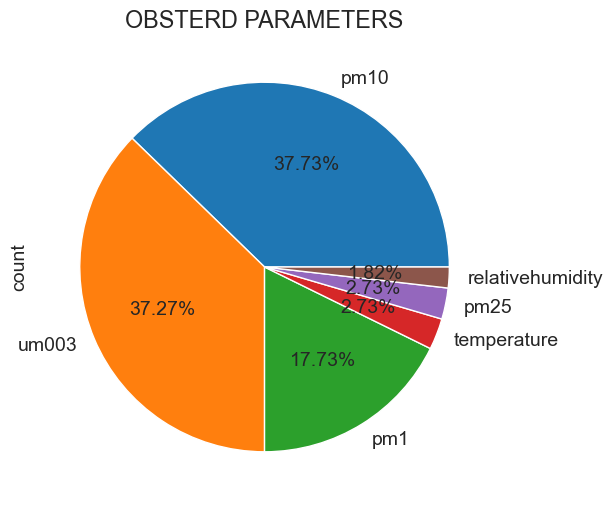

In [101]:
obsterd['parameter'].value_counts().plot(kind='pie',figsize=(6,6),autopct='%0.2f%%')
plt.title("OBSTERD PARAMETERS")

### Distribtution of parameters

In [102]:
    fig = px.histogram(obsterd, x='value', color='parameter', marginal='box',title='Distribution of Air Quality Measurements', 
                       barmode='overlay', # Set bars to overlay on top of the other'
                       nbins=20,
                       histnorm='percent', # to invlude percentage
                       histfunc='count', # Set histfunc to 'count'
                       opacity=0.5)
    fig.update_layout(bargap=0.1)
    fig.show()


### Analysis over time

In [103]:
# Time Series Plots
fig = px.line(obsterd, x='datetimeLocal', y='value', color='parameter', title='Air Quality Time Series in Obsterd',
              labels={'datetimeLocal': 'Date', 'value': 'Value'})
fig.show()


# Beslk_USA

In [104]:
belsk = cities1[cities1["location_name"]=="Belsk_USA"]
pd.DataFrame(belsk)

,location_id,location_name,parameter,value,unit,datetimeLocal,timezone,latitude,longitude,Date
17945,10864,Belsk_USA,no2,4.70,µg/m³,2020-07-09 16:00:00+00:00,Europe/Warsaw,51.835242,20.791912,2020-07-09
17946,10864,Belsk_USA,no2,7.00,µg/m³,2020-07-09 17:00:00+00:00,Europe/Warsaw,51.835242,20.791912,2020-07-09
17947,10864,Belsk_USA,no2,7.30,µg/m³,2020-07-09 18:00:00+00:00,Europe/Warsaw,51.835242,20.791912,2020-07-09
17948,10864,Belsk_USA,no2,9.60,µg/m³,2020-07-09 19:00:00+00:00,Europe/Warsaw,51.835242,20.791912,2020-07-09
17949,10864,Belsk_USA,no2,12.00,µg/m³,2020-07-09 20:00:00+00:00,Europe/Warsaw,51.835242,20.791912,2020-07-09
...,...,...,...,...,...,...,...,...,...,...
22212,10864,Belsk_USA,o3,95.00,µg/m³,2020-07-25 12:00:00+00:00,Europe/Warsaw,51.835242,20.791912,2020-07-25
22239,10864,Belsk_USA,o3,99.00,µg/m³,2020-07-27 13:00:00+00:00,Europe/Warsaw,51.835242,20.791912,2020-07-27
22259,10864,Belsk_USA,o3,110.00,µg/m³,2020-07-28 10:00:00+00:00,Europe/Warsaw,51.835242,20.791912,2020-07-28
22335,10864,Belsk_USA,o3,120.00,µg/m³,2020-08-11 13:00:00+00:00,Europe/Warsaw,51.835242,20.791912,2020-08-11


### Pie chart for parameter distribution

Text(0.5, 1.0, 'BELSK PARAMETERS')

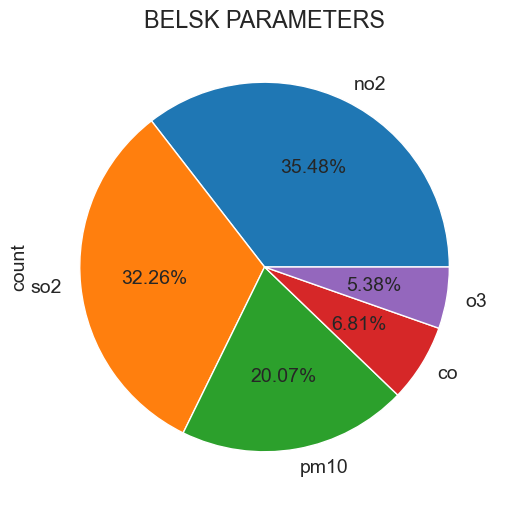

In [119]:
belsk['parameter'].value_counts().plot(kind='pie',figsize=(6,6),autopct='%0.2f%%')
plt.title("BELSK PARAMETERS")

### Summary statistics

In [106]:
summary_belsk = belsk.groupby(['Date', 'parameter'])['value'].agg(['mean', 'median', 'min', 'max']).reset_index()
print(summary_belsk.head(10))


         Date parameter        mean  median     min    max
0  2020-07-09        co  176.666667  180.00  160.00  190.0
1  2020-07-09       no2    7.837500    7.20    4.70   12.0
2  2020-07-09       so2    0.882857    0.85    0.70    1.2
3  2020-07-10        co  210.000000  210.00  200.00  220.0
4  2020-07-10       no2    6.250000    6.35    5.00    7.2
5  2020-07-10       so2    1.260000    1.00    0.88    1.9
6  2020-07-12        co  140.000000  140.00  130.00  150.0
7  2020-07-12       no2    3.854545    3.20    2.20    7.8
8  2020-07-12       so2    1.183333    1.10    0.95    1.5
9  2020-07-13        co  280.000000  240.00  170.00  430.0


## Distribution of parameters

In [107]:
    fig = px.histogram(belsk, x='value', color='parameter', marginal='box',title='Distribution of Air Quality Measurements', 
                       barmode='overlay', # Set bars to overlay on top of the other'
                       nbins=20,
                       histnorm='percent', # to invlude percentage
                       histfunc='count', # Set histfunc to 'count'
                       opacity=0.5)
    fig.update_layout(bargap=0.1)
    fig.show()


## Line plot for trend analysis

In [108]:
# Time Series Plots
fig = px.line(belsk, x='datetimeLocal', y='value', color='parameter', title='Air Quality Time Series in Belsk',
              labels={'datetimeLocal': 'Date', 'value': 'Value'})
fig.show()


# Kaposvar_Canada

In [109]:
kaposvar = cities1[cities1["location_name"]=="Kaposvár_Canada"]
pd.DataFrame(kaposvar)

,location_id,location_name,parameter,value,unit,datetimeLocal,timezone,latitude,longitude,Date
22945,1192419,Kaposvár_Canada,no2,8.2,µg/m³,2023-07-10 00:00:00+00:00,Europe/Budapest,46.37158,17.7968,2023-07-10
22946,1192419,Kaposvár_Canada,no2,6.9,µg/m³,2023-07-10 23:00:00+00:00,Europe/Budapest,46.37158,17.7968,2023-07-10
22947,1192419,Kaposvár_Canada,no2,3.6,µg/m³,2023-07-11 12:00:00+00:00,Europe/Budapest,46.37158,17.7968,2023-07-11
22948,1192419,Kaposvár_Canada,no2,8.5,µg/m³,2023-07-11 19:00:00+00:00,Europe/Budapest,46.37158,17.7968,2023-07-11
22949,1192419,Kaposvár_Canada,no2,8.8,µg/m³,2023-07-11 22:00:00+00:00,Europe/Budapest,46.37158,17.7968,2023-07-11
...,...,...,...,...,...,...,...,...,...,...
27377,1192419,Kaposvár_Canada,o3,95.0,µg/m³,2023-09-05 11:00:00+00:00,Europe/Budapest,46.37158,17.7968,2023-09-05
27477,1192419,Kaposvár_Canada,o3,72.0,µg/m³,2023-09-09 19:00:00+00:00,Europe/Budapest,46.37158,17.7968,2023-09-09
27524,1192419,Kaposvár_Canada,o3,55.0,µg/m³,2023-09-11 19:00:00+00:00,Europe/Budapest,46.37158,17.7968,2023-09-11
27564,1192419,Kaposvár_Canada,o3,150.0,µg/m³,2023-09-13 14:00:00+00:00,Europe/Budapest,46.37158,17.7968,2023-09-13


### Percentage propportions

Text(0.5, 1.0, 'KAPOSVAR PARAMETERS')

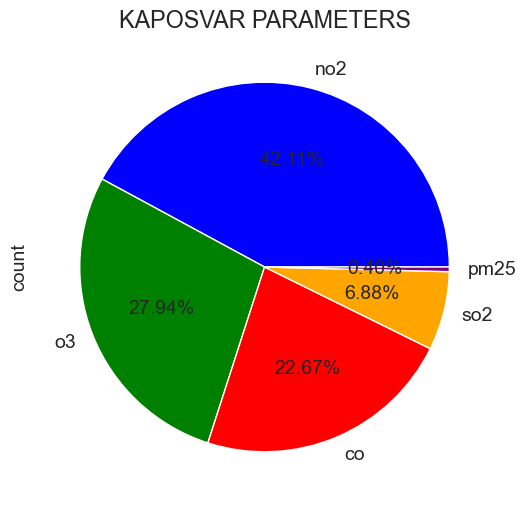

In [118]:
colors = ['blue', 'green', 'red', 'orange', 'purple']
kaposvar['parameter'].value_counts().plot(kind='pie',figsize=(6,6),autopct='%0.2f%%', colors =colors)
plt.title("KAPOSVAR PARAMETERS")

### Statisctics of parameters

In [112]:
summary_kaps = kaposvar.groupby(['Date', 'parameter'])['value'].agg(['mean', 'median', 'min', 'max']).reset_index()
print(summary_kaps.head(10))


         Date parameter        mean  median    min    max
0  2023-07-10        co  210.000000  210.00  210.0  210.0
1  2023-07-10       no2    7.550000    7.55    6.9    8.2
2  2023-07-10        o3   44.500000   44.50   38.0   51.0
3  2023-07-10       so2    0.250000    0.25    0.2    0.3
4  2023-07-11        co  230.000000  230.00  180.0  280.0
5  2023-07-11       no2    6.966667    8.50    3.6    8.8
6  2023-07-11        o3   32.000000   32.00   32.0   32.0
7  2023-07-11       so2    0.100000    0.10    0.1    0.1
8  2023-07-12        co  320.000000  320.00  320.0  320.0
9  2023-07-12       no2    6.700000    6.70    6.7    6.7


### Histogram distribution

In [114]:
    fig = px.histogram(kaposvar, x='value', color='parameter', marginal='box',title='Distribution of Air Quality Measurements', 
                       barmode='overlay', # Set bars to overlay on top of the other'
                       nbins=20,
                       histnorm='percent', # to invlude percentage
                       histfunc='count', # Set histfunc to 'count'
                       opacity=0.5)
    fig.update_layout(bargap=0.1)
    fig.show()


## Line plot for time series over view

In [115]:
# Time Series Plots
fig = px.line(kaposvar, x='datetimeLocal', y='value', color='parameter', title='Air Quality Time Series in Kaposvar',
              labels={'datetimeLocal': 'Date', 'value': 'Value'})
fig.show()


# GENERAL REPORT AND RECOMMENDATIONS



As we can see from the above graphs PM2.5 and pm10 changes seasonally , Their peak in months like jan to march is Comparatively low but increases significantly over time

Also at glance pm25,pm10,pm1 levels are lower in 2022 and 2023 compared to 2024, this might be due to climate changes in different parts of the world or cities. Activities like deforestation, carbon gas emmission from vehicles and industries among others might have contributed to this increase.

## Solutions to curb the increasing effect levels of poor Air Quality

Integration of clean renewable energy instead of fossil fuels, ensuring equitable and affordable access for all

Measures which reduce short-lived climate pollutants such as addressing emissions from the burning or collection of municipal solid waste

Policies and regulations which improve indoor air quality by incentivizing energy access and energy efficiency of buildings and appliances

Preserving our forests and other natural sinks, as well as in expanding them

Sustainable food systems, reduced food waste, and the promotion of healthy diets

A more local, circular, and low-carbon economy incentivising safe reuse, remanufacturing, and recycling of products instead of burning

Sustainable transport systems including encouraging active travel, work from home, and implementing policies to reduce daily commuting and reducing business travel